<a href="https://colab.research.google.com/github/pk2971/EDA-Black-Friday-Shoppers/blob/main/EDA_Black_Friday_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('BlackFriday.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df=df.fillna(0)
#Only two columns have null values and we filled them with 0

**We try to visualize the number of the gender of the shoppers**

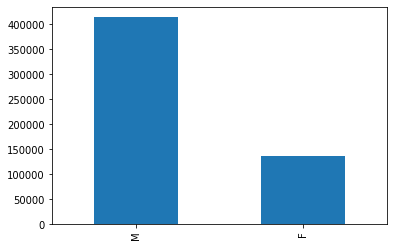

In [6]:
df['Gender'].value_counts().plot(kind='bar')

Surprisingly most of the black friday shoppers are significantly Male.

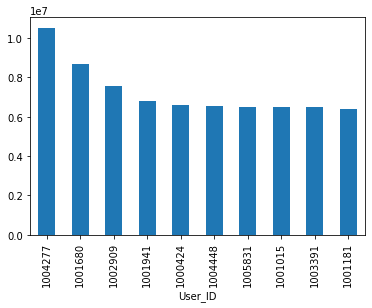

In [7]:
df_mostSpent=df.groupby('User_ID')['Purchase'].sum().nlargest(10).plot(kind='bar')

We can see the top 10 users based upon the amount the spent just on Black Friday.

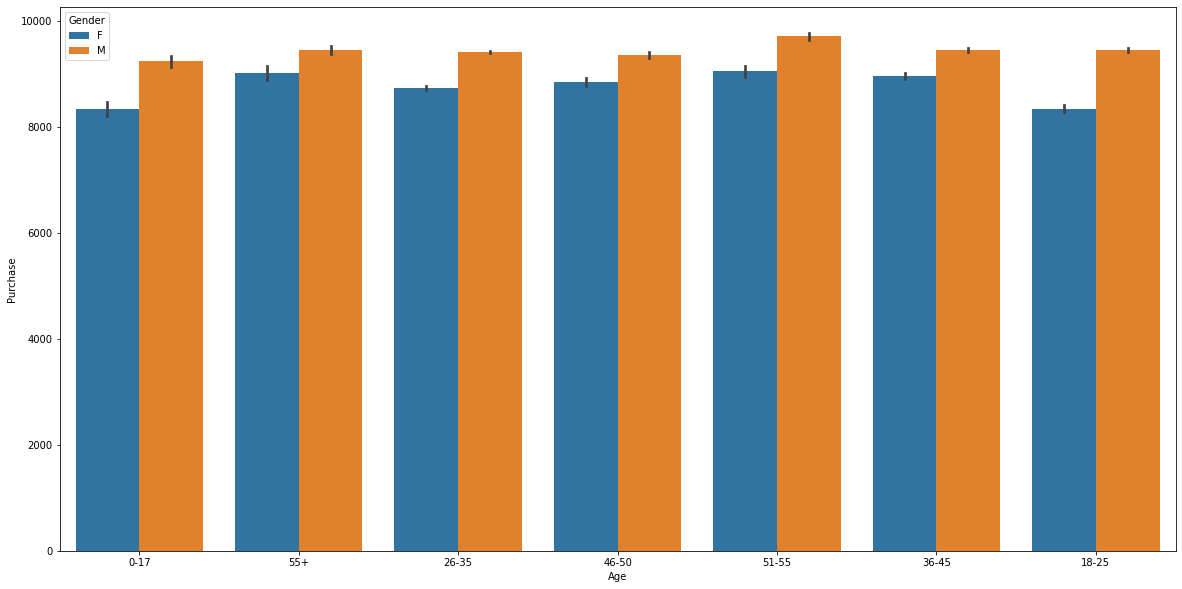

In [8]:
import seaborn as sns
plt.figure(figsize=(20,10)) 
sns.barplot(x=df['Age'],y=df['Purchase'],hue=df['Gender'])
     

We can see that in every age range, female customers seems to be the higher spenders, though overall most purchases were made by men.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


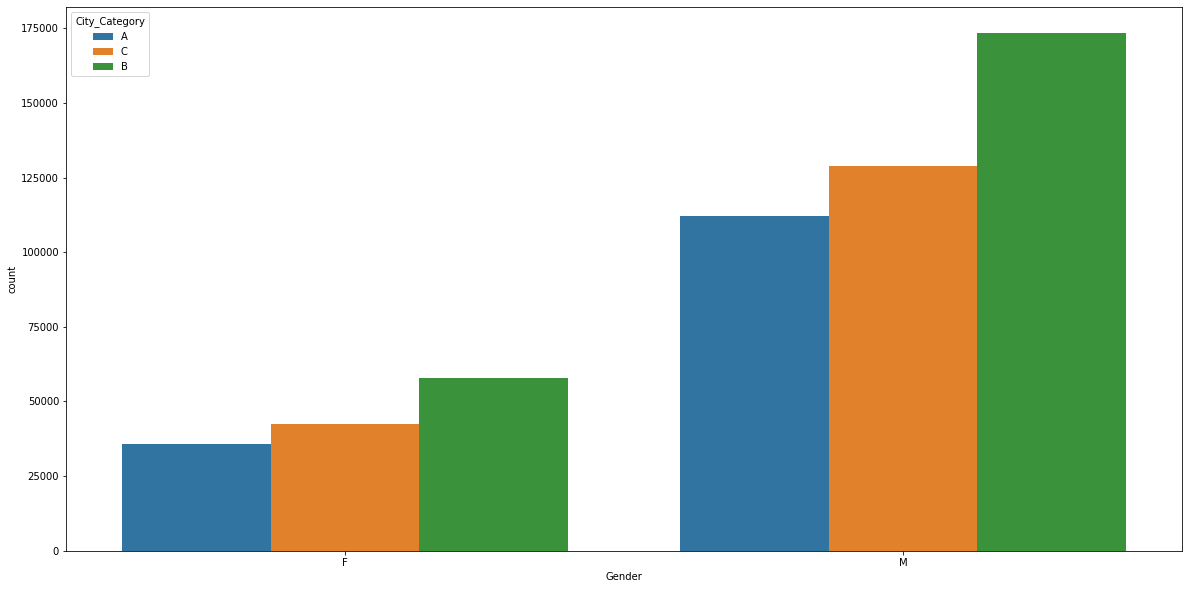

In [9]:
plt.figure(figsize=(20,10)) 
sns.countplot(df['Gender'],hue=df['City_Category'])

In both categories, male and female most of the customers are from city B. We could focus on targeted ads to female customers in the city B area and focus on marketing to get more customers from city A and city C.

In [16]:
#Label Encoder to transform categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'].astype(str))
df['Age']= le.fit_transform(df['Age'].astype(str))
df['City']= le.fit_transform(df['City_Category'].astype(str))
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'].astype(str))


In [20]:
corr_df= df[['Gender', 'Age', 'Occupation', 'City_Category', 
    'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
corr_matrix=corr_df.corr()
corr_matrix

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004262,0.117291,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.060346
Age,-0.004262,1.000000,0.091463,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,0.117291,0.091463,1.000000,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,-0.011603,0.311738,0.024280,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,-0.000954,0.018770,0.006712,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.036146,-0.007422,0.012269,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000


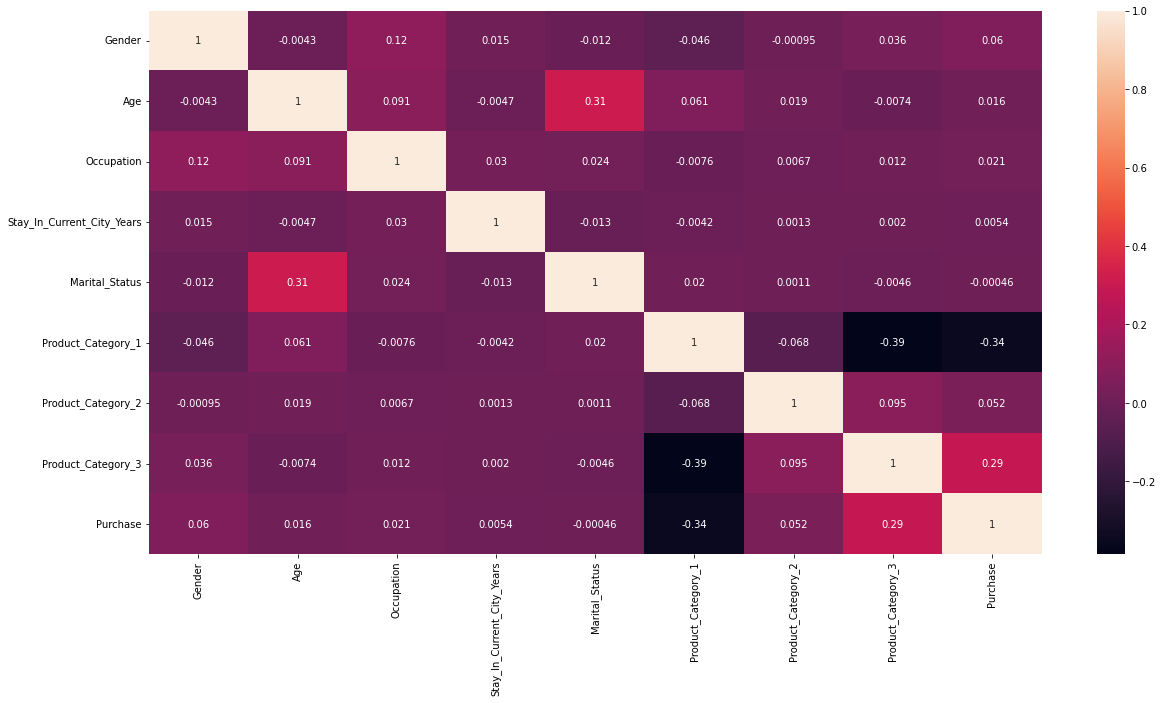

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr_matrix,annot=True)

Gender, Age and occupation has more correlation to the Purchase.

In [22]:
X=df[['Age', 'Gender', 'Purchase','Occupation']]

In [23]:
from sklearn.cluster import KMeans
kmeans5=KMeans(n_clusters=5,init='k-means++',random_state=42).fit(X)
#kmeans5.fit(X)
kmeans5.labels_
kmeans5Visualize=X.copy()
kmeans5Visualize.loc[:,'Cluster']=kmeans5.labels_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


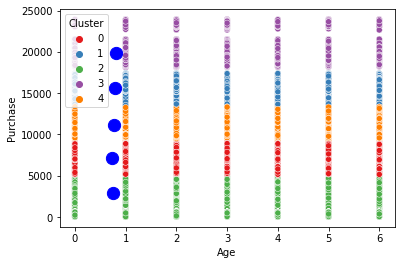

In [26]:
scat_1 = sns.scatterplot('Age', 'Purchase', data=kmeans5Visualize,
                hue='Cluster', palette='Set1', legend='full')
plt.scatter(kmeans5.cluster_centers_[:, 1], kmeans5.cluster_centers_[:, 2], s=150, c='blue', label = 'Centroids')

We can cluster the customers based upon their age, Gender etc. We can also assign ranks using clusters to identify important customers and to make use of the data to retain them or to identify low spending cuatomers and market more effectively or differently to them.